#### Actividad Práctica 4.1: Análisis de Distribuciones de Probabilidad

-Objetivo
El objetivo es analizar una distribución de probabilidad en un conjunto de datos utilizando herramientas estadísticas en Python.

Paso 1: Selección del conjunto de datos
Para este ejercicio, elegiremos datos simulados de alturas de personas en centímetros, que es una variable numérica continua.

 -Justificación:
 La altura es un ejemplo típico de una variable que sigue aproximadamente una distribución normal en poblaciones grandes. Esto permitirá explorar herramientas estadísticas y ajustar una distribución teórica.



Paso 2: Generar y cargar los datos
En este caso, generaremos datos simulados utilizando una distribución normal con:
Media = 170 cm
Desviación estándar = 10 cm
Tamaño de la muestra = 500
Estos valores son razonables para una población adulta.

In [1]:
import numpy as np
import pandas as pd

# Fijamos la semilla para reproducibilidad
np.random.seed(42)

# Generamos datos de alturas simulados con distribución normal
alturas = np.random.normal(loc=170, scale=10, size=500)

# Convertimos en un DataFrame
df = pd.DataFrame(alturas, columns=["Altura"])

# Mostramos las primeras filas del dataset
df.head()

,Altura
0,174.967142
1,168.617357
2,176.476885
3,185.230299
4,167.658466


-Explicación:
np.random.normal(loc=170, scale=10, size=500): Genera 500 datos siguiendo una distribución normal con media 170 y desviación estándar 10.
Se almacenan en un DataFrame para facilitar el análisis.


Paso 3: Análisis estadístico
Ahora calculamos las principales métricas estadísticas:
Media (promedio): Valor central de la distribución.
Varianza: Cuantifica la dispersión de los datos.
Skewness (asimetría): Mide si la distribución es simétrica o sesgada.


In [2]:
from scipy.stats import skew
# Cálculo de estadisticas descriptivas
media = df['Altura'].mean()
varianza = df['Altura'].var()
asimetria = skew(df['Altura'])

print(media, varianza, asimetria)

170.0683799458865 96.28579354581817 0.1796229506966613


Explicación:
df['Altura'].mean() -> Calcula la media
df['Altura'].var() -> Calcula la varianza
skew(df['Altura']) -> Calcula la asimetria

Paso 4: Visualización con Histograma
Para comprender la distribución, creamos un histograma y superponemos una curva de densidad.

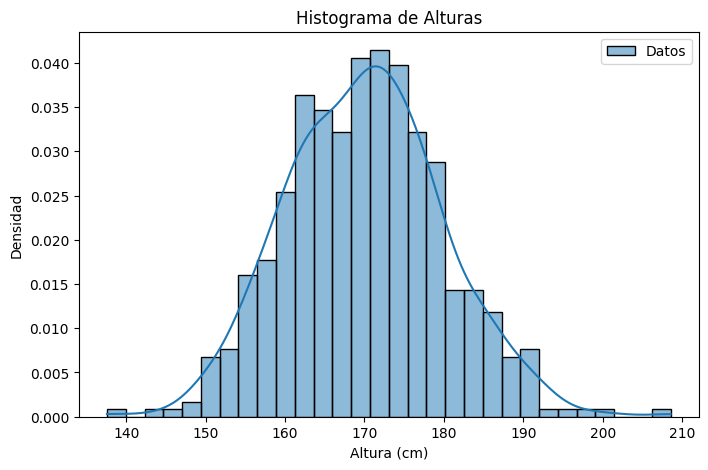

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el gráfico
plt.figure(figsize=(8,5))

# Histograma con KDE (Estimación de densidad del Núcleo)
sns.histplot(df['Altura'], bins=30, kde=True, stat='density', label='Datos')

#xmin, xmax = plt.xlim()


# Etiquetas
plt.xlabel("Altura (cm)")
plt.ylabel("Densidad")
plt.title("Histograma de Alturas")
plt.legend()
plt.show()



Explicación:
sns.histplot(df['Altura'], ....) -> Genera el histograma y la curva de densidad
El histograma permite ver la frecuencia de valores y la KDE da una idea de la forma de la distribución

Paso 5: Ajuste de una distribución teórica

Ahora ajustamos una distribución normal y la superponemos en el histograma.

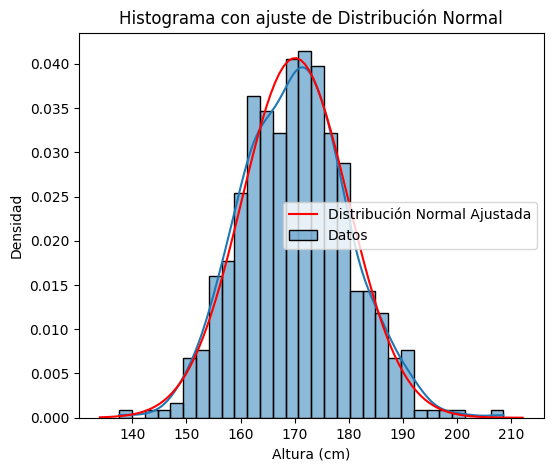

In [9]:
from scipy.stats import norm

# Graficamos nuevamente el histograma y la distribución ajustada
plt.figure(figsize=(6, 5))
sns.histplot(df['Altura'], bins=30, kde=True, stat='density', label='Datos')

# Valores del eje x
# xmin, xmax = df['Altura'].min(), df['Altura'].max()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# PDF (Función de densidad de probabilidad) de la distribución normal ajustada
p = norm.pdf(x, media, np.sqrt(varianza))

# Agregamos la curva de la distribución normal ajustada
plt.plot(x, p, 'r', label='Distribución Normal Ajustada')

# Etiquetas
plt.xlabel('Altura (cm)')
plt.ylabel('Densidad')
plt.title('Histograma con ajuste de Distribución Normal')

plt.legend()
plt.show()


Explicación:
- norm.pdf(x, media, np.sqrt(varianza)) -> Calcula la  función de densidad de probabilidad de la distribución normal ajustada a nuestros datos
- plt.plot(x, p, 'r', label='Distribución Normal Ajustada') -> Superpone la curva de la distribución normal sobre el histograma

Paso 6: Interpretación de Resultados

Los resultados obtenidos fueron:
- Media: 170,07 cm  (coincide con los datos generados)
- Varianza: 96,29 cm2  (Indica que los datos no estan muy dispersos)
- Asimetria: 0.18  (Un valor cercano a 0 indica que la distribución es caso simétrica)
